<a href="https://colab.research.google.com/github/Habiba-Tantawi/Heee7/blob/master/time_series_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model



from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# from sklearn.datasets import make_classification

# from numpy import array
# from keras.layers import Bidirectional

In [90]:
# Rendering the dataset
data = pd.read_excel('/content/dataset final trial.xlsx') #House 1 Real data
# data = pd.read_excel('/content/sample_data/House 2 model(FAKE DATASET).xlsx') #House 2 FAKE DATA
# data = data.dropna()
data.head()

,Time,Kitchen_Lights,Fridge,Laptop,ADSL_Router,Total1,Total2,Total3,Total4,Total5,Total6,Total7,Total8
0,1355523692,1,1,1,1,537,528,534,531,533,532,537,530
1,1355523698,1,1,1,1,537,538,539,534,535,537,534,542
2,1355523704,1,1,1,1,537,539,534,532,530,559,535,533
3,1355523710,1,1,1,1,536,547,555,532,530,539,541,532
4,1355523716,1,1,1,1,539,540,534,538,533,534,535,535


In [91]:
data.shape

(237, 13)

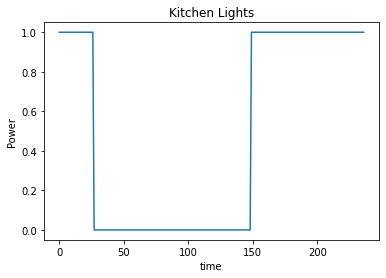

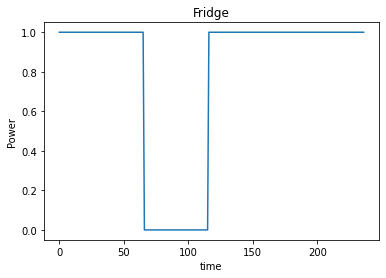

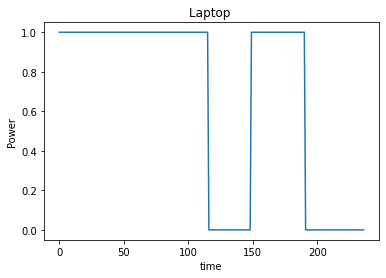

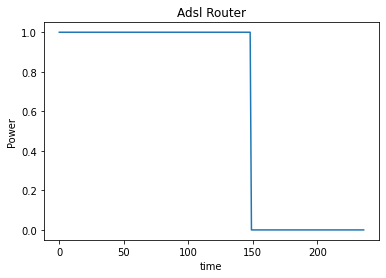

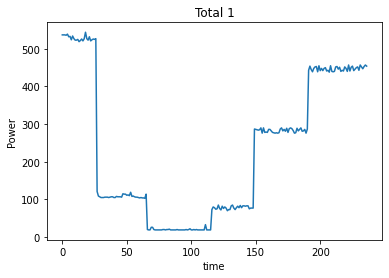

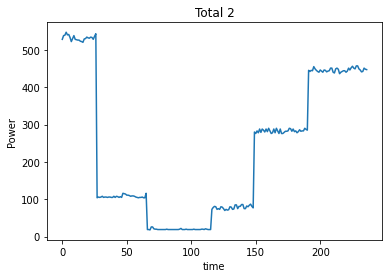

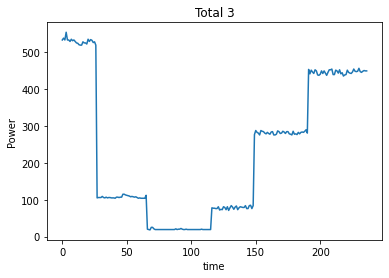

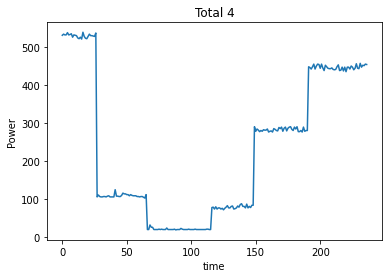

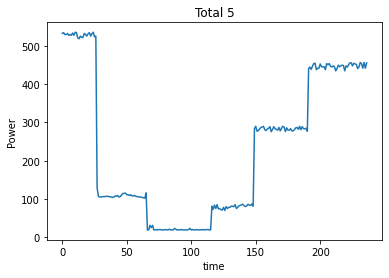

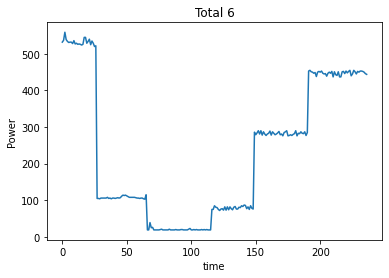

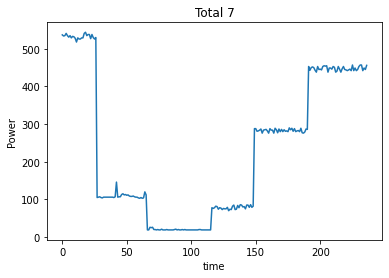

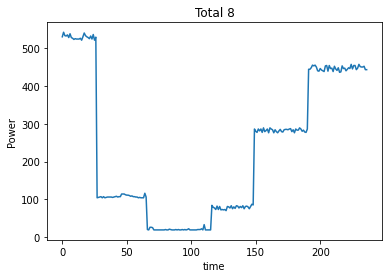

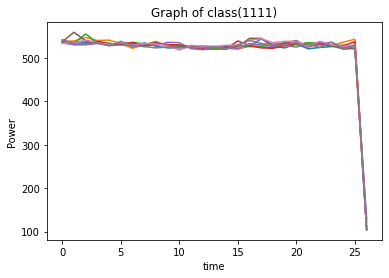

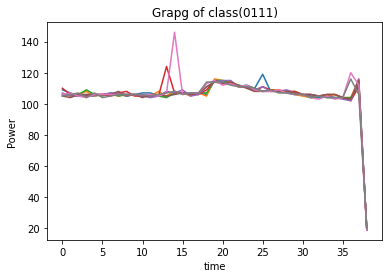

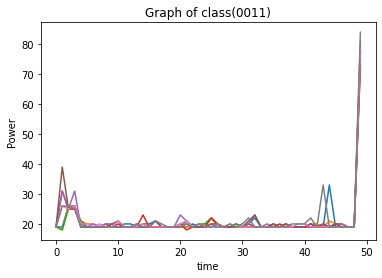

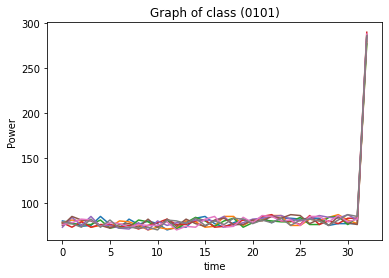

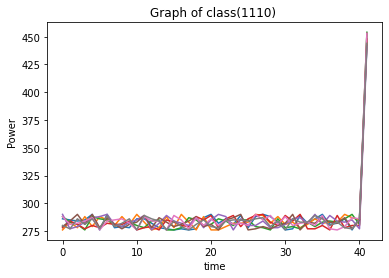

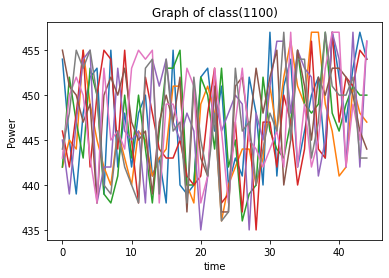

In [92]:
# CODE OF THE REAL DATA (HOUSE 1)

# Graph for each appliance 
Kitchen_Lights = data.iloc[:,1].values
plt.plot(Kitchen_Lights)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Kitchen Lights")
plt.show()

fridge = data.iloc[:,2].values
plt.plot(fridge)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Fridge")
plt.show()

Laptop = data.iloc[:,3].values
plt.plot(Laptop)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Laptop ")
plt.show()

Adsl = data.iloc[:,4].values
plt.plot(Adsl)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Adsl Router")
plt.show()

# ==========================================================================================================================


# Graph of the total 1
dataset = data.iloc[:,5].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total 1")
plt.show()

# Graph of the total 2
dataset = data.iloc[:,6].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total 2")
plt.show()

# Graph of the total 3
dataset = data.iloc[:,7].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total 3")
plt.show()

# Graph of the total 4
dataset = data.iloc[:,8].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total 4")
plt.show()

# Graph of the total 5
dataset = data.iloc[:,9].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total 5")
plt.show()

# Graph of the total 6
dataset = data.iloc[:,10].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total 6")
plt.show()

# Graph of the total 7
dataset = data.iloc[:,11].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total 7")
plt.show()

# Graph of the total 8
dataset = data.iloc[:,12].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total 8")
plt.show()

# Graph of class(1111)
dataset = data.iloc[1:28,5:13].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Graph of class(1111)")
plt.show()

# Graph of class(0111)
dataset = data.iloc[28:67,5:13].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Grapg of class(0111)")
plt.show()

#Graph of class(0011)
dataset = data.iloc[67:117:,5:13].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Graph of class(0011)")
plt.show()


# Graph of class(0101)
dataset = data.iloc[117:150,5:13].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Graph of class (0101)")
plt.show()


# Graph of class(1110)
dataset = data.iloc[150:192,5:13].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Graph of class(1110) ")
plt.show()


# Graph of class(1100)
dataset = data.iloc[192:238,5:13].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Graph of class(1100)")
plt.show()

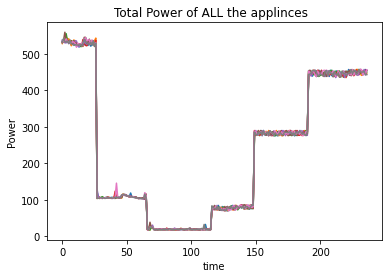

In [93]:
# Graph of the total
dataset = data.iloc[:,5:13].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Power")
plt.title("Total Power of ALL the applinces  ")
plt.show()

In [94]:
# Printing the final (Total) and the data types for all the data
print(dataset)
# print(data)
data.dtypes

[[537 528 534 ... 532 537 530]
 [537 538 539 ... 537 534 542]
 [537 539 534 ... 559 535 533]
 ...
 [453 451 451 ... 450 449 452]
 [457 448 450 ... 446 445 443]
 [454 447 450 ... 444 456 443]]


Time              int64
Kitchen_Lights    int64
Fridge            int64
Laptop            int64
ADSL_Router       int64
Total1            int64
Total2            int64
Total3            int64
Total4            int64
Total5            int64
Total6            int64
Total7            int64
Total8            int64
dtype: object

In [95]:
# reshaping dataset(Total) 
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float64")
dataset.shape
print(dataset)
dataset.shape

[[537.]
 [528.]
 [534.]
 ...
 [444.]
 [456.]
 [443.]]


(1896, 1)

In [96]:
# Preparing the data for the model
X = data.iloc[:,5:13].values
print(X)
Y = data.iloc[:,1:5].values
print(Y)

[[537 528 534 ... 532 537 530]
 [537 538 539 ... 537 534 542]
 [537 539 534 ... 559 535 533]
 ...
 [453 451 451 ... 450 449 452]
 [457 448 450 ... 446 445 443]
 [454 447 450 ... 444 456 443]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0

In [97]:
# Spliting the data to 2 parts Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Train size: {}, Test size: {} ".format(len(X_train), len(X_test)))

(165, 8) (72, 8) (165, 4) (72, 4)
Train size: 165, Test size: 72 


In [98]:
# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X, Y)

In [99]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[ 19  19  19 ...  19  19  19]
 [105 104 104 ... 106 104 104]
 [276 278 276 ... 279 289 284]
 ...
 [ 83  86  79 ...  83  80  83]
 [457 448 450 ... 446 445 443]
 [106 106 106 ... 106 106 106]]
[[0 0 1 1]
 [0 1 1 1]
 [1 1 1 0]
 [0 1 0 1]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [1 1 1 1]
 [0 1 1 1]
 [1 1 0 0]
 [0 1 1 1]
 [1 1 1 0]
 [0 0 1 1]
 [0 1 1 1]
 [1 1 0 0]
 [1 1 1 0]
 [0 0 1 1]
 [0 1 0 1]
 [0 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 0]
 [0 0 1 1]
 [0 1 1 1]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]
 [1 1 0 0]
 [0 0 1 1]
 [1 1 0 0]
 [0 1 1 1]
 [0 1 0 1]
 [0 0 1 1]
 [1 1 0 0]
 [0 1 0 1]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]
 [0 1 0 1]
 [0 0 1 1]
 [1 1 0 0]
 [0 0 1 1]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 0 0]
 [0 1 0 1]
 [0 0 1 1]
 [0 1 0 1]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 0 0]
 [1 1 1 0]
 [0 1 1 1]
 [1 1 0 0]
 [0 0 1 1]
 [0 1 1 1]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 1 0 1]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [1 1

In [100]:
X_train.shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_train.shape

(165, 8)

In [101]:
y_train.shape

(165, 4)

In [102]:
# Implementing the Model
model = Sequential()
model.add(LSTM(10, input_shape=(None,1))) # 10 lstm neuron(block)
# model.add(LSTM(100, input_shape=(None,1))) # 100 lstm neuron(block)
# model.add(LSTM(100)) # 100 LSTM neuron block
model.add(Dense(4, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['mae','mse','accuracy'])
# model.compile(loss='sigmoid', optimizer='adam',metrics=['mae','mse'])
# model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(None, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.fit(X_train, y_train, epochs=300, batch_size=16)

Epoch 1/300
11/11 [==============================] - 2s 5ms/step - loss: 0.7740 - mae: 0.5025 - mse: 0.2862 - accuracy: 0.0303
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 0.7509 - mae: 0.4950 - mse: 0.2756 - accuracy: 0.0000e+00
Epoch 3/300
11/11 [==============================] - 0s 5ms/step - loss: 0.7260 - mae: 0.4878 - mse: 0.2650 - accuracy: 0.0000e+00
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 0.7084 - mae: 0.4812 - mse: 0.2570 - accuracy: 0.0000e+00
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6944 - mae: 0.4749 - mse: 0.2503 - accuracy: 0.0000e+00
Epoch 6/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6806 - mae: 0.4692 - mse: 0.2438 - accuracy: 0.0000e+00
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6665 - mae: 0.4626 - mse: 0.2371 - accuracy: 0.0000e+00
Epoch 8/300
11/11 [==============================] - 0s 5ms/step - loss: 0.6520 - mae: 

In [103]:
model.save('gfgModel.h5')
print('Model Saved!')

Model Saved!


In [104]:
savedModel=load_model('gfgModel.h5')
savedModel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 524
Trainable params: 524
Non-trainable params: 0
_________________________________________________________________


In [105]:
X_test.shape
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
X_test.shape

(72, 8)

In [106]:
# Testing the model 
result = savedModel.predict(X_test)
# result = model.predict(X_test)

In [107]:
# rounding results
for i in range(len(result)):
  for j in range(len(result[i])):
    # if result[i] == [1 1 0 0]:
    #  print([1 1 0 0])
    result[i][j]=round(result[i][j])

In [108]:
# Printing the result of the testing
for (i,j,k) in zip(X_test,result,y_test):
  
  # print(i,j,k)|

  print("Input : {}".format(i))
  print("Model results: {}".format(j))
  print("The real result: {}".format(k))
  print("================================================================")

Input : [448 443 450 455 446 453 444 442]
Model results: [1. 1. 1. 0.]
The real result: [1 1 0 0]
Input : [73 80 78 76 78 82 74 77]
Model results: [0. 1. 0. 1.]
The real result: [0 1 0 1]
Input : [19 19 21 18 21 20 21 20]
Model results: [0. 0. 1. 1.]
The real result: [0 0 1 1]
Input : [19 19 19 19 19 19 20 20]
Model results: [0. 0. 1. 1.]
The real result: [0 0 1 1]
Input : [440 438 440 440 446 451 451 452]
Model results: [1. 1. 1. 0.]
The real result: [1 1 0 0]
Input : [539 540 534 538 533 534 535 535]
Model results: [1. 1. 1. 0.]
The real result: [1 1 1 1]
Input : [19 19 20 20 19 20 20 20]
Model results: [0. 0. 1. 1.]
The real result: [0 0 1 1]
Input : [121 104 105 105 129 105 105 104]
Model results: [0. 1. 1. 1.]
The real result: [0 1 1 1]
Input : [72 80 74 73 72 76 77 72]
Model results: [0. 1. 0. 1.]
The real result: [0 1 0 1]
Input : [440 440 442 439 448 437 438 437]
Model results: [1. 1. 1. 0.]
The real result: [1 1 0 0]
Input : [452 457 449 444 441 452 445 447]
Model results: [1.

In [109]:
print(result)

[[1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1.

In [110]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [111]:
pip install -q tensorflow-model-optimization

In [112]:
import tempfile
import os

import tensorflow as tf

from tensorflow import keras

In [113]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Normalize the input image so that each pixel value is between 0 to 1.
X_train, X_test = X_train / 255.0, X_test / 255.0
sample, sample_label = X_train[0], y_train[0]
model = Sequential()
# Define the model architecture.
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

# Train the digit classification model
#model.compile(optimizer='adam',
 #             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  #            metrics=['accuracy'])

#model.fit(
 # train_images,
  #train_labels,
  #epochs=1,
  #validation_split=0.1,)

In [114]:
#quantize_model = tfmot.quantization.keras.quantize_model
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [115]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

q_aware_model.fit(X_train, y_train, epochs=1)

q_aware_model.evaluate(X_test, y_test)

converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()

len(tflite_qaware_model)

with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_2 (QuantizeL  (None, 28, 28)           3         
 ayer)                                                           
                                                                 
 quant_reshape_2 (QuantizeWr  (None, 28, 28, 1)        1         
 apperV2)                                                        
                                                                 
 quant_conv2d_2 (QuantizeWra  (None, 26, 26, 12)       147       
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_2 (Quan  (None, 13, 13, 12)       1         
 tizeWrapperV2)                                                  
                                                                 
 quant_flatten_2 (QuantizeWr  (None, 2028)            

INFO:tensorflow:Assets written to: /tmp/tmpbwwtqw4g/assets


INFO:tensorflow:Assets written to: /tmp/tmpbwwtqw4g/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [116]:
!sudo apt-get update
!sudo apt-get install xxd

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 2s (126 kB/s)
Reading package li

In [117]:
x_test = X_test.astype('float32')

# Instantiate an interpreter for each model
exercice_model = tf.lite.Interpreter('tflite_qaware_model.tflite')

# Allocate memory for each model
exercice_model.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
input_details = exercice_model.get_input_details()
output_details = exercice_model.get_output_details()

test = 15
print(x_test.shape)
input_data = x_test[test].reshape((28,28))
exercice_model.get_tensor(input_details[0]['index'])
exercice_model.invoke()
  
output_data = exercice_model.get_tensor(output_details[0]['index'])
    
  
print(output_data)  
print(Y[test])

(10000, 28, 28)
[[3.0447495 2.7636957 2.6700113 2.6700113 2.7636957 2.8808014 2.7402747
  2.6934323 2.6231687 2.7402744]]
[1 1 1 1]


In [118]:
# Save the file as a C source file
!xxd -i tflite_qaware_model.tflite >tflite_qaware_model.cc
# Print the source file
!cat tflite_qaware_model.cc

unsigned char tflite_qaware_model_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x70, 0x01, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 0x18, 0x01, 0x00, 0x00,
  0x90, 0x00, 0x00, 0x00, 0x09, 0x00, 0x00, 0x00, 0x1c, 0x5d, 0x00, 0x00,
  0xe4, 0x5a, 0x00, 0x00, 0x38, 0x5a, 0x00, 0x00, 0x84, 0x59, 0x00, 0x00,
  0x4c, 0x58, 0x00, 0x00, 0x68, 0x55, 0x00, 0x00, 0x70, 0x54, 0x00, 0x00,
  0xd0, 0x02, 0x00, 0x00, 0x34, 0x02, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x58, 0x01, 0x00, 0x00, 0x16, 0x00, 0x00, 0x00, 0x20, 0x60, 0x00, 0x00,
  0x1c, 0x60, 0x00, 0x00, 0x28, 0x5f, 0x00, 0x00, 0xac, 0x5e, 0x00, 0x00,
  0x44, 0x5e, 0x00, 0x00, 0xdc, 0x5d, 0x00, 0x00, 0x78, 0x5d, 0x00, 0x00,
  0x04, 0x60, 0x00, 0x00, 0x80, 0x5b, 0x00, 0x00, 0xf0, 0x5a, 0x0